In [14]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score 
import numpy as np

In [40]:
def pipeline_preprocess(X_new, rf_indices, anova_selector, trained_model,scaler):
    X_scaled = scaler.transform(X_new)
    
    # Step 2: Select RF Top Features
    X_rf_selected = X_scaled[:, rf_indices]
    
    # Step 3: Apply ANOVA selector
    X_anova_selected = anova_selector.transform(X_rf_selected)
    print(np.round(X_anova_selected[0],2))
    # Step 4: Predict
    return trained_model.predict(X_anova_selected)

In [41]:
import joblib
selector = joblib.load("./pipeline/anova_selector.joblib")
scaler = joblib.load("./pipeline/scaler.joblib")
model = joblib.load("./pipeline/mood_disorder_classificator.joblib")
rf_indices = joblib.load("./pipeline/randomForest_classificator.joblib")
rf_indices = rf_indices.feature_importances_.argsort()[-35:][::-1]

dataset = pd.read_csv("FINAL.csv")
X_values = dataset.drop(columns = ["MRID","diagnosis"])
Y_values = dataset["diagnosis"]
Y_values

0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    0
Name: diagnosis, dtype: int64

In [42]:
y_pred = pipeline_preprocess(X_values,rf_indices,selector,model,scaler)

[-0.06  1.25 -0.25  1.02  1.16  1.66 -0.59 -0.49  0.74  0.66 -0.52 -0.17
 -0.75  0.03  0.75 -0.52  1.07  0.1   0.71 -0.86  0.76 -0.72 -0.11  0.66
 -0.36  1.48 -0.02  0.21 -0.92  0.91]


In [45]:
import numpy as np

X_scaled = scaler.transform(X_values)
X_rf = X_scaled[:, rf_indices]
X_final = selector.transform(X_rf)

print("SVM input shape:", X_final.shape)
print("Sample input to SVM:", np.round(X_final[0], 2))
model.classes_

SVM input shape: (8, 30)
Sample input to SVM: [-0.06  1.25 -0.25  1.02  1.16  1.66 -0.59 -0.49  0.74  0.66 -0.52 -0.17
 -0.75  0.03  0.75 -0.52  1.07  0.1   0.71 -0.86  0.76 -0.72 -0.11  0.66
 -0.36  1.48 -0.02  0.21 -0.92  0.91]


array([0, 1, 2])

/home/aaronhcd/Desktop/Proyectos/Data Analysis/MRI-Project-General-Analysis/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([1, 1, 0, 1, 1, 0, 1, 1])

0    2
1    2
2    2
3    2
4    2
5    2
6    2
7    0
Name: diagnosis, dtype: int64

In [53]:
X_values.describe()


,Intra_Cranial_Volume,Total_Brain_Volume,Cerebrospinal_Fluid,Gray_Matter,White_Matter,Gray_Matter_Left,White_Matter_Left,Gray_Matter_Right,White_Matter_Right,Corpus_Callosum,...,Right_Superior_Parietal_Lobule,Left_Superior_Parietal_Lobule,Right_Superior_Temporal_Gyrus,Left_Superior_Temporal_Gyrus,Right_Temporal_Pole,Left_Temporal_Pole,Right_Triangular_Part_of_the_Inferior_Frontal_Gyrus,Left_Triangular_Part_of_the_Inferior_Frontal_Gyrus,Right_Transverse_Temporal_Gyrus,Left_Transverse_Temporal_Gyrus
count,8.000000e+00,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,1.409929e+06,1.242849e+06,165651.157417,734261.617843,467026.111978,359408.576481,225791.273992,364457.115993,229585.914536,11648.923450,...,9456.243645,9078.143855,6994.046073,6591.454158,10265.145435,8789.267234,3521.993358,3807.639579,1362.176282,1766.433800
std,1.076675e+05,9.341961e+04,26525.060276,62199.567852,33482.747625,30627.903925,15855.232466,30975.754429,16876.234491,1153.452269,...,1268.581856,1104.041004,643.986865,732.988094,968.782225,1074.202836,449.209992,509.066659,266.200891,287.713806
min,1.262588e+06,1.146672e+06,114857.193847,661917.129145,409166.947144,323572.834873,197189.263000,329140.038481,201616.630127,10087.590117,...,7304.867253,7207.304955,6255.497192,5847.585349,8733.436523,7386.608639,2929.711487,3241.619934,1063.211731,1277.339355
25%,1.342280e+06,1.185356e+06,152814.407150,693961.329239,455585.876185,339992.584839,221623.094309,343102.695755,223484.877930,11152.893021,...,9087.427856,8423.075241,6507.375641,6049.105392,9537.127846,8175.219421,3235.794990,3455.262130,1165.324615,1657.536746
50%,1.392200e+06,1.211597e+06,173038.637512,710852.347504,460008.024048,347986.476532,223485.496796,352741.223755,225499.072543,11676.763062,...,9286.702698,9307.125275,6981.775234,6392.885437,10580.132568,8471.656219,3466.887146,3679.158173,1314.680469,1727.873779
75%,1.463787e+06,1.288153e+06,178902.701981,772971.018921,481383.345108,377571.054642,230841.647110,384602.919189,238349.419586,11907.600067,...,9819.236862,9995.923096,7269.818512,6984.211868,10877.188232,9311.766769,3687.203430,4053.262650,1517.459351,1916.627899
max,1.599740e+06,1.418176e+06,203325.937927,846309.111450,521306.698059,414788.725586,251547.974060,419581.223633,257229.163635,13742.537659,...,11759.691101,10172.918762,8047.733032,7982.133240,11442.831726,10457.597107,4294.929810,4687.290833,1743.964294,2273.713562


In [1]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score 
import numpy as np

dataset = pd.read_csv("../FINAL_CSVs/MD_DATASET_SITE_ID.csv")


X_values = dataset.drop(columns=["MRID","diagnosis","site_id"])
Y_values = dataset["diagnosis"]
X_train, x_test, y_train, y_test = train_test_split(X_values, Y_values, test_size=0.2, random_state=42) #dividir datasets
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(x_test)

rf_X = RandomForestClassifier(n_estimators=100, random_state=42)
rf_X.fit(X_train_scaled, y_train)

indices = rf_X.feature_importances_.argsort()
feature_importances = rf_X.feature_importances_
map_indices_values = [(index,value) for  index,value in zip(indices,feature_importances)]

for i, tupl in enumerate(map_indices_values):
    for j in range(0, len(map_indices_values) - i - 1):

      # compare two adjacent elements
      # change > to < to sort in descending order
      if map_indices_values[j][1] > map_indices_values[j + 1][1]:

        # swapping elements if elements
        # are not in the intended order
        temp = map_indices_values[j]
        map_indices_values[j] = map_indices_values[j+1]
        map_indices_values[j+1] = temp
sorted_new = map_indices_values[::-1]

rf_top_35_indices = np.array([value[0] for value in map_indices_values])[0:35]

X_train_35 = X_train_scaled[:, rf_top_35_indices]
X_test_35 = x_test_scaled[:, rf_top_35_indices]


anova_final_selector = SelectKBest(score_func=f_classif, k=30)
X_final = anova_final_selector.fit_transform(X_train_35, y_train)
X_test = anova_final_selector.transform(X_test_35)

svm_model = SVC(kernel='rbf', C=10, gamma=0.001, random_state=42) #0.001 #C = 10
svm_model.fit(X_final, y_train)
y_predict = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.8428571428571429

In [47]:
important_features = [X_train.columns[index] for index in rf_top_35_indices]
important_features

['Right_Parahippocampal_Gyrus',
 'Right_Lateral_Orbital_Gyrus',
 'Corpus_Callosum.1',
 'Right_Parietal_Operculum',
 'Occipital_White_Matter_Right',
 'Anterior_Limb_of_Internal_Capsule_Right',
 'Right_Anterior_Cingulate_Gyrus',
 'Parietal_Medial_Gray_Matter_Right',
 'Right_Occipital_Pole',
 'Cerebellum_Left',
 'Right_Postcentral_Gyrus',
 'Right_Medial_Orbital_Gyrus',
 'Cerebellum',
 'Right_Inferior_Temporal_Gyrus',
 'Occipital',
 'Left_Frontal_Pole',
 'Cerebellar_Vermal_Lobules_I-V',
 'Frontal_Medial_Gray_Matter_Right',
 'Left_Superior_Parietal_Lobule',
 'Right_Central_Operculum',
 'Right_Superior_Frontal_Gyrus_Medial_Segment',
 'Left_Precentral_Gyrus',
 'Frontal_Lateral_Gray_Matter_Right',
 'Frontal_Left',
 'Left_Triangular_Part_of_the_Inferior_Frontal_Gyrus',
 'Right_Posterior_Insula',
 'Limbic_Gray_Matter',
 'Cerebellar_Vermal_Lobules_VIII-X',
 'Occipital_Inferior_Gray_Matter_Left',
 'Left_Ventral_Dorsal_Column',
 'Right_Precentral_Gyrus',
 'Right_Ventral_Dorsal_Column',
 'Limbic_Cin

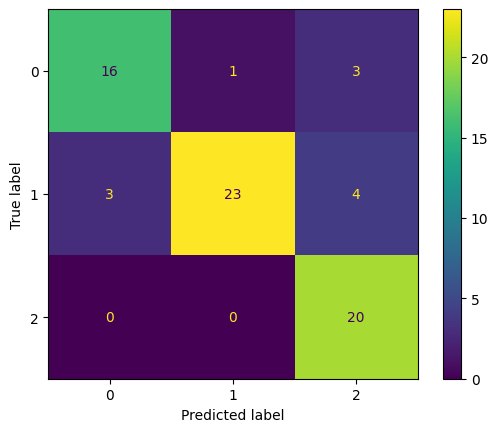

In [2]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(y_test,y_predict, labels=svm_model.classes_)
DISP = ConfusionMatrixDisplay(cf, display_labels=svm_model.classes_)
DISP.plot()